1ª Etapa
Exploração e Visualização de Dados abertos do Airbnb em Nova York: Esta etapa tem como objetivo explorar e gerar visualizações sobre os dados de atividades no Airbnb e as métrias de listagem em Nova York utilizando a linguagem python e o ambiente interativo do jupyter notebook para demonstrar os passos das análises.

<h1>Breve Introdução</h1>

<p style="text-align:justify">
O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.
</p>
<p style="text-align:justify">
O conjunto de dados escolhido, dataset, fornece-nos informações sobre os hosts, a disponibilidade geográfica, as métricas necessárias para fazer previsões e tirar conclusões sobre o preço da hospedagem na cidade de Nova York, NY, no ano de 2019. Segue abaixo uma breve explicação sobre as colunas existentes e o que elas representam:
</p>
<ul>
    <li><b>ID / ID</b> - <i>id do estabelecimento;</i></li>
    <li><b>NAME / NOME</b> - <i>Nome do estabelecimento;</i></li>
    <li><b>HOST_ID / ID DO ANFITRIÃO</b> - <i>id do anfitrião;</i></li>
    <li><b>HOST_NAME / NOME DO ANFITRIÃO</b> - <i>Nome do Anfitrião;</i></li>
    <li><b>NEIGHBOURDHOOD_GROUP / DISTRITO</b> - <i>Nome do Distrito;</i></li>
    <li><b>NEIGHBOURHOOD / BAIRRO</b> - <i>Nome do Bairro;</i></li>
    <li><b>LATITUDE / LATITUDE</b> - <i>Localização medida em graus, de zero a 90 para norte ou para sul, a partir da Linha do Equador;</i></li>
    <li><b>LONGITUDE / LONGITUDE</b> - <i>Localização medida em graus, de zero a 180 para leste ou para oeste, a partir do Meridiano de Greenwich;</i></li>
    <li><b>ROOM_TYPE / TIPO DE QUARTO</b> - <i>Tipo de quarto;</i></li>
    <li><b>PRICE / PREÇO</b> - <i>Preço por noite;</i></li>
    <li><b>MINIMUM_NIGHTS / NÚMERO MÍNIMO DE NOITES</b> - <i>Número mínimo de noites para ficar no estabelecimento;</i></li>
    <li><b>NUMBER_OF_REVIEWS / NÚMERO DE AVALIAÇÕES</b> - <i>Número de avaliações que o estabelecimento recebeu;</i></li>
    <li><b>LAST_REVIEW / ÚLTIMA AVALIAÇÃO</b> - <i>Data da última avaliação que o estabelecimento recebeu;</i></li>
    <li><b>REVIEWS_PER_MONTH / AVALIAÇÕES POR MÊS</b> - <i>Avaliações que o estabelecimento recebeu por mês;</i></li>
    <li><b>CALCULATED_HOST_LISTINGS_COUNT / NÚMERO DE APARTAMENTOS</b> - <i>Número de estabelecimentos que o anfitrião possui;</i></li>
    <li><b>AVAILABILITY_365 / DISPONIBILIDADE</b> - <i>Número de dias que o estabelecimento está disponível durante o ano;</i></li>
</ul>

<h1>Importação das Bibliotecas</h1>

In [4]:
# pandas #(comentar)
import pandas as pd 
from pandas.tools.plotting import scatter_matrix 

# numpy #(comentar)
import numpy as np 

# matplotlib #(comentar)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

# (comentar)
import seaborn as sns

# time (calular tempo gasto nos modelos)
from time import time

# warnings (deixar de poluir o documento com warnings)
import warnings
warnings.filterwarnings('ignore')

# scikit-learn #(comentar)
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler, Imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

# scikit-learn modelos #(comentar)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#(comentar)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

#(comentar)
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

%matplotlib inline 

<h1>Exploração e Preparação do Dataset</h1>

In [5]:
#Realizando a leitura do arquivo csv.
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [6]:
#Quantidade de linhas e colunas contidas no dataset.
airbnb.shape

(48895, 16)

O pacote pandas permite tranformar o nosso dataset em um dataframe, que transforma os dados em uma estrutura de 2 dimensões, linhas e colunas, abaixo podemos visualizar os dados na forma de uma tabela.

In [7]:
#Utilizei a função "head" para obter uma prévia das primeiras 5 linhas do dataframe.
airbnb.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<h1>Limpeza de Dados</h1>

<p style="text-lign:justify">
    Para a análise de dados que desejamos fazer as variáveis id, name, minimum_nights e last_review não são necessárias, portando vamos retirá-las de nosso dataframe.
</p>

In [8]:
#Retirando variáveis desnecessárias.
airbnb = airbnb.drop(columns=["id","host_id","name","host_name","minimum_nights","last_review"])

In [9]:
airbnb.head(2)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  number_of_reviews  reviews_per_month  \
0    149                  9               0.21   
1    225                 45               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

<p style="text-align:justify">
Um problema muito comum que encontramos ao trabalhar com grandes conjuntos de dados é a existência de valores nulos ou não preenchidos, que podem existir por erros de preenchimento, erros na importação e transformação dos dados, não existência da informação, ou qualquer outro motivo.
</p>

<p style="text-align:justify">
O tratamento que iremos dar para os valores nulos depende do nosso objetivo com a análise de dados, podemos deixar os valores nulos caso eles não impactem negativamente na nossa análise, podemos apagar a linha inteira que possuí um valor nulo, podemos preencher os valores nulos com um valor específico, existem inúmeras formas de tratar valores nulos, mas sempre devemos manter em mente o nosso objetivo com a análise de dados para decidir qual tratativa utilizar.
</p>

In [12]:
#Visualizando a quantidade de valores nulos em cada coluna.
airbnb.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
airbnb = airbnb.fillna(0)

<p style="text-align:justify">
A coluna calculater_host_listing_count possuí valores nulos, mas não será relevante para nossa análise, então podemos deixar os valores dessa coluna na forma original.
</p>

<h1>Visualizando os dados</h1>

<p><b> NUMERO DE REVIEWS Análise do gráfico ~ comentário aqui</b></p>

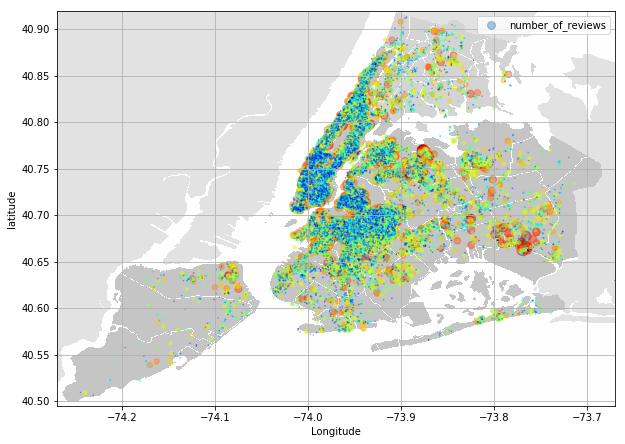

In [15]:
new_york = mpimg.imread('New_York_City_.png',0)

airbnb.plot(kind="scatter", x='longitude', y='latitude', marker="o",
            s=(airbnb["number_of_reviews"]/5), grid=True, colorbar=False, c=np.log(airbnb["number_of_reviews"]), 
            cmap=plt.get_cmap("jet"), figsize=(10,10), label="number_of_reviews", alpha=0.4)

plt.imshow(new_york, alpha=0.4, cmap=plt.get_cmap("jet"), extent=[-74.27, -73.67, 40.495, 40.92])
eixo_x = np.linspace(min(airbnb.longitude), max(airbnb.longitude), 0.3)
plt.xlabel("Longitude")
plt.legend()
plt.title("")
plt.show()

<p><b>PREÇO ~ comentário aqui</b></p>

In [16]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
airbnb.shape

(48895, 10)

In [18]:
airbnb = airbnb.sort_values("price", ascending=True).iloc[int(0.1*airbnb.shape[0]): int(0.9*airbnb.shape[0])].sort_index()

In [19]:
airbnb.shape

(39116, 10)

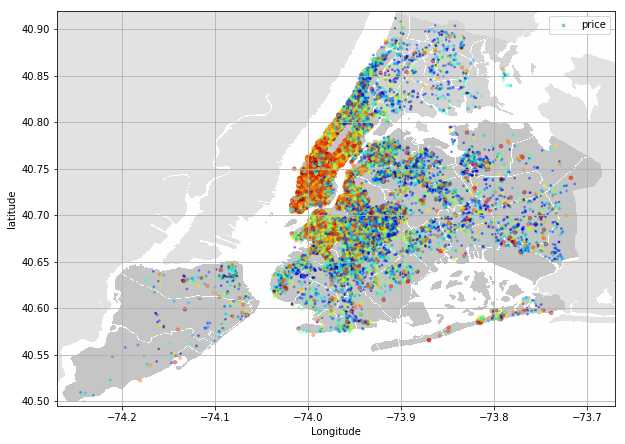

In [21]:
new_york = mpimg.imread('New_York_City_.png',0)

airbnb.plot(kind="scatter", x='longitude', y='latitude', marker="o",
            s=(airbnb["price"])/20, grid=True, colorbar=False, c=np.log(airbnb["price"]), 
            cmap=plt.get_cmap("jet"), figsize=(10,10), label="price", alpha=0.4)

plt.imshow(new_york, alpha=0.4, cmap=plt.get_cmap("jet"), extent=[-74.27, -73.67, 40.495, 40.92])
eixo_x = np.linspace(min(airbnb.longitude), max(airbnb.longitude), 0.3)
plt.xlabel("Longitude")
plt.legend()
plt.title("")
plt.show()

<p><b>distribuição 1 (preço) ~comentário</b></p>

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(airbnb['price']);

In [ ]:
airbnb['price'].describe()

<p><b>distribuição 2 (numero de reviews) ~comentário</b></p>

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.distplot(airbnb['number_of_reviews'], bins=50);

In [ ]:
airbnb['number_of_reviews'].describe()

<p><b>analisar a coluna "room_type", pois ela parece ser relevante para a análise</b></p>

In [ ]:
# analisar a coluna "room_type", pois ela parece ser relevante para a análise
airbnb["room_type"].value_counts() # Essa coluna mostrou bastante potencial como variável qualitativa

<p><b>texto explicando a matriz</b></p>

In [ ]:
scatter_matrix(airbnb[airbnb.columns], figsize=(30,15), alpha=0.3, c='r')
plt.show();

<p><b>Medindo a Relação entre Variáveis</b></p>

<p style="text-align:justify">
Muitas vezes quando trabalhamos com análise de dados é de grande utilidade medirmos a relação entre duas variáveis, este conceito serve de base para criação de alguns tipos de modelos preditivos, explicando de forma simplificada: se sabemos a relação entre a variável X e a variável Y conseguimos criar um modelo matemático que possuindo apenas novas variáveis de entrada X irá prever a variável de saída Y.
</p>

<p style="text-align:justify">
A medida da força da correlação é expressa como um coeficiente, chamado de coeficiente de correlação de Pearson e ele assume valores entre -1 e 1.
</p>

<ul>
    <li>0.9 a 1.0 positivo ou negativo indica uma correlação muito forte;</li>
    <li>0.7 a 0.9 positivo ou negativo indica uma correlação forte;</li>
    <li>0.5 a 0.7 positivo ou negativo indica uma correlação moderada;</li>
    <li>0.3 a 0.5 positivo ou negativo indica uma correlação fraca;</li>
    <li>0 a 0.3 positivo ou negativo indica uma correlação desprezível;</li>
</ul>

<p>Vamos agora explorar a relação entre as variáveis do nosso conjunto de dados:</p>

In [ ]:
#gerando uma tabela com a correlação entre todas as variáveis do nosso dataset.
airbnb.corr()

<p>Outra forma visual de verificarmos a correlação entre as variáveis:</p>

In [26]:
def plot_corr(df, size=8):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (2.5*size, 2.5*size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

In [35]:
#plot_corr(airbnb)

texto explicando as correlações

ANALISE DAS VARIÁVEIS COM ALTA CORRELAÇÃO

In [ ]:
airbnb.isnull().sum()

2ª Etapa
Prevendo o preço de hospedagem no Airbnb com Python e Machine Learning: Nesta etapa utilizamos a linguagem Python e seus pacotes para criar um modelo preditivo capaz de prever o preço de hospedagem no Airbnb.

<h1>O que é um modelo preditivo?</h1>

<p style="text-align:justify">
Basicamente, um modelo preditivo é uma função matemática que aplicada a um conjunto de dados, consegue identificar padrões ocultos, e com base nesses padrões, realizar previsões. O objetivo do aprendizado de máquina, Machine Learning, é "aprender" a aproximação da função que melhor representa a relação entre os atributos de entrada, variáveis preditoras, com a variável de saída, que queremos prever.
</p>

<p style="text-align:justify">
Os algoritmos de aprendizagem de máquina são divididos, na maioria das vezes, em 3 tipos: Aprendizagem Supervisionada, Aprendizagem Não Supervisionada e Aprendizagem por Reforço.
</p>

<h1>O Processo</h1>

<p style="text-align:justify">
De forma simplificada, o processo para a criação de um modelo preditivo é composto pela sequência de atividades:
</p>

<ul>
    <li>1 - Coleta de Dados;</li>
    <li>2 - Exploração e Preparação dos Dados;</li>
    <li>3 - Treinamento do Modelo;</li>
    <li>4 - Avaliação do Modelo;</li>
    <li>5 - Otimização do Modelo;</li>
</ul>

<p style="text-align:justify">
Essas atividades são realizadas iterativamente, modificando parâmetros, organizando dados, obtendo novos dados, testando algoritmos, criando novas variáveis, entre outras, até que se tenha o modelo ideal para resolver o problema de negócios em que estamos trabalhando.
</p>

<h1>Preparação dos Dados</h1>

Normalmente a criação do modelo preditivo em si é bem rápida se comparada ao tempo que o cientista de dados precisar dedicar para preparar o conjunto de dados, pois os dados podem vir de diversas fontes, em diversos formatos, com erros ou necessitando de manipulações, cabe a nós realizarmos as atividades que irão garantir que o modelo preditivo receba corretamente as informações de entrada. A etapa de preparação dos dados é de extrema importância para garantir a precisão do nosso modelo, é certo que dados de entrada ruins irão gerar saídas ruins, nunca devemos negligenciar esta etapa.

Vamos agora obter informações que podem ser úteis para que saibamos quais atividades ainda precisamos realizar antes de criar o modelo preditivo:

<h1>Escolha das Variáveis Preditoras</h1>

<p>
Vamos aqui classificar nossas variáveis em dois tipos:
</p>
<ul>
    <li>Variáveis preditoras: são as variáveis que serão utilizadas como entrada para o modelo preditivo;</li>
    <li>Variáveis targets: são as variáveis que queremos prever;</li>
</ul>
   
<p style="text-align:justify">
Já sabemos que queremos prever o preço de hospedagem em um estabelecimento do airbnb em Nova York, NY, com base no conjunto de dados obtidos no site Kaggle, logo a nossa variável target é a coluna x, y e z.
</p>

In [25]:
airbnb.corr()

latitude  longitude     price  \
latitude                        1.000000   0.079702  0.041032   
longitude                       0.079702   1.000000 -0.278166   
price                           0.041032  -0.278166  1.000000   
number_of_reviews              -0.017075   0.052656 -0.039807   
reviews_per_month              -0.027416   0.139919 -0.065778   
calculated_host_listings_count  0.018445  -0.112473  0.178494   
availability_365               -0.016807   0.103974  0.056974   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.017075          -0.027416   
longitude                                0.052656           0.139919   
price                                   -0.039807          -0.065778   
number_of_reviews                        1.000000           0.590284   
reviews_per_month                        0.590284           1.000000   
calculated_host_listings_count          -0.066025          -0.038834   
availability_365                         0.192175           0.177365   

                                calculated_host_listings_count  \
latitude                                              0.018445   
longitude                                            -0.112473   
price                                                 0.178494   
number_of_reviews                                    -0.066025   
reviews_per_month                                    -0.038834   
calculated_host_listings_count                        1.000000   
availability_365                                      0.227045   

                                availability_365  
latitude                               -0.016807  
longitude                               0.103974  
price                                   0.056974  
number_of_reviews                       0.192175  
reviews_per_month                       0.177365  
calculated_host_listings_count          0.227045  
availability_365                        1.000000

In [36]:
#plot_corr(airbnb)

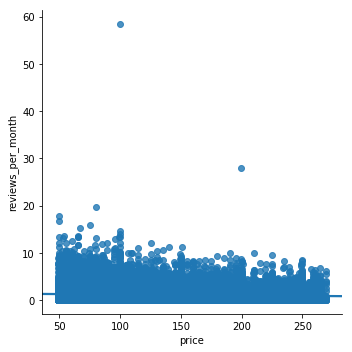

In [30]:
sns.lmplot(x='price', y='reviews_per_month', data = airbnb)

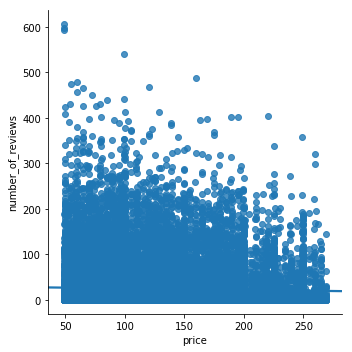

In [33]:
sns.lmplot(x='price', y='number_of_reviews', data = airbnb)

<p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace; background-color:rgb(50,50,50); color:rgb(0,255,0); padding:1vh 1vw; border:hidden; border-radius:3px">Separação em treinamento e teste</p>

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

In [ ]:
strat_test_set.dropna().shape

In [ ]:
strat_train_set.dropna().shape

In [ ]:
airbnb = strat_train_set.dropna().drop("price", axis=1)
airbnb_labels = strat_train_set.dropna()["price"].copy()

In [ ]:
airbnb.head(2)

In [ ]:
airbnb.shape, airbnb_labels.shape

In [ ]:
num_attribs = list(airbnb.drop(columns=["neighbourhood_group","neighbourhood","room_type"]).columns)
cat_attribs = ["neighbourhood_group","neighbourhood","room_type"]

num_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(num_attribs) ),
    ('imputer', SimpleImputer(strategy="median")),
    ( 'std_scaler', StandardScaler() )
])
cat_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(cat_attribs) ),
    ( 'label_encoder', LabelEncoder())
])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

In [ ]:
airbnb_prepared = full_pipeline.fit_transform(airbnb)

In [ ]:
airbnb_prepared.shape

In [ ]:
some_data = airbnb.iloc[:5]

In [ ]:
some_labels = airbnb_labels.iloc[:5]

In [ ]:
some_data_prepared = full_pipeline.transform(some_data)

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace;">Regressão Linear</p><hr>

In [ ]:
time_init = time()

lin_reg = LinearRegression()
lin_reg.fit(airbnb_prepared, airbnb_labels)

time_exit = time()
print("Tempo gasto: {:.2f} segundos".format(time_exit - time_init))

In [ ]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

In [ ]:
airbnb_predictions = lin_reg.predict(airbnb_prepared)

In [ ]:
lin_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
time_init = time()
lin_scores = cross_val_score(lin_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
display_scores(lin_rmse_scores)

In [ ]:
plt.plot(airbnb_labels, airbnb_labels, 'r-', markersize=2)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Regressão Logística</p><hr>

In [ ]:
time_init = time()

log_reg = LogisticRegression()
log_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
print("Predictions:\t", log_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

In [ ]:
time_init = time()

log_rmse_scores = cross_val_score(log_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
display_scores(log_rmse_scores)

In [ ]:
airbnb_predictions = log_reg.predict(airbnb_prepared)

In [ ]:
plt.plot(airbnb_labels, airbnb_labels, 'r.')
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Decision Tree</p><hr>

In [ ]:
time_init = time()

tree_reg = DecisionTreeRegressor()
tree_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
print("Predictions:\t", tree_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

In [ ]:
airbnb_predictions = tree_reg.predict(airbnb_prepared)

In [ ]:
tree_mse = mean_squared_error(airbnb_labels, airbnb_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
time_init = time()

scores = cross_val_score(tree_reg, airbnb_prepared, airbnb_labels,
    scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
display_scores(rmse_scores)

In [ ]:
plt.plot(airbnb_labels, airbnb_labels, 'r.', markersize=5)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Random Forest</p><hr>

In [ ]:
time_init = time()

forest_reg = RandomForestRegressor()
forest_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
time_init = time()

forest_rmse_scores = cross_val_score(forest_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))

In [ ]:
print("Predictions:\t", forest_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

In [ ]:
display_scores(forest_rmse_scores)

In [ ]:
airbnb_predictions = forest_reg.predict(airbnb_prepared)

In [ ]:
plt.plot(airbnb_labels, airbnb_labels, 'r.', markersize=3)
plt.plot(airbnb_labels, airbnb_predictions, '.', markersize=2)
plt.grid(True)
plt.show()

<h1>Resultado</h1>

In [38]:
#print("Regressão Linear: {0:.4f}".format()))
#print("Regressão Logística: {0:.4f}".format()))
#print("Deciosion Tree: {0:.4f}".format()))
#print("Random Forest: {0:.4f}".format()))

<p>breve análise</p>
<p>Poderíamos realizar atividades para melhorar o desempenho do modelo, cada projeto que realizamos demanda uma precisão, muitas vezes teremos de realizar o treinamento do modelo de maneira iterativa, comparando algoritmos, testando novas variáveis preditoras, criando novas variáveis, obtendo mais dados ou realizando manipulações no conjunto de dados antes do trabalho ser finalizado. Lembrando sempre que a precisão do modelo deve atender ao necessário para resolver o problema de negócios em que estamos trabalhando.</p>



<h1>Conclusão e Publicação do Modelo</h1>

<p style="text-align:justify">
Tão importante quanto criar o modelo preditivo, é realizar a publicação dele, isso significa, coloca-lo para fazer aquilo que ele foi criado.
</p>

<p>Devemos considerar que o aprendizado pode ser feito de duas formas:</p>
<ul>
    <li><b>Aprendizado offline:</b> O modelo é treinado uma vez em dados históricos e implantado de forma constante, e se necessário reestruturado caso se torne instável.</li>
    <li><b>Aprendizado online:</b> O modelo é constantemente atualizado à medida que novos dados chegam.</li>
</ul>
    
<p>Também precisamos definir como o algoritmo fará as previsões:</p>
<ul>
    <li><b>Previsões em lote:</b> Dados de entrada são processados e o algoritmo gera uma tabela de previsões, funcionam bem quando a saída não precisa ser atualizada o tempo todo.</li>
    <li><b>Previsões sob demanda:</b> As previsões são feitas em tempo real usando os dados de entrada disponíveis no momento da solicitação.</li>
</ul>

<p style="text-align:justify">
Lembrando que todo modelo preditivo é criado para resolver um problema específico de negócio, e ele pode ser entregue e aplicado de inúmeras formas: aplicações Web, como parte de um sistema ERP, sites interativos, Dashboards, relatórios, apresentações na empresa. O que eu quero dizer é que a publicação do modelo deve ser levada em consideraçao dentro do planejamento do processo de trabalho do Cientista de Dados.
</p>

<p>
Este foi o nosso primeiro trabalho com Machine Learning, o objetivo era demonstrar de maneira simples as atividades necessárias para criarmos um modelo preditivo, mas isso foi apenas uma introdução do que ainda faremos com Machine Learning.

Seguiremos trabalhando, obrigado!
</p>

<h1>Referências</h1>

https://www.airbnb.com.br/help/article/2503/o-que-%C3%A9-o-airbnb-e-como-ele-funciona